## Importing Libraries

In [1]:
from pandas_datareader import data
import csv
import pandas as pd
import pandas_datareader as web
import sys
import io
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.figure(figsize=(21,10))

from pandas.plotting import register_matplotlib_converters

## Getting stock data for all the brands

### The ticker symbol for the brands goes as follows: 

APPLE:  AAPL

BOEING: BA

MICROSOFT: MSFT

TESLA: TSLA

J P MORGAN: JPM

In [2]:
# We have extracted stock data for all the brands starting from 16th March to 16th April

start = datetime.datetime(2019,3,15)
end = datetime.datetime(2019,4,16)
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL; similarly it was performed for all the other brands; 
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)
 
apple['Date'] = apple.index
apple.reset_index(drop=True)
apple.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2019-03-15  187.330002  183.740005  184.850006  186.119995  39042900   
2019-03-18  188.389999  185.789993  185.800003  188.020004  26219800   
2019-03-19  188.990005  185.919998  188.350006  186.529999  31646400   
2019-03-20  189.490005  184.729996  186.229996  188.160004  31035200   
2019-03-21  196.330002  189.809998  190.020004  195.089996  51034200   

             Adj Close       Date  
Date                               
2019-03-15  186.119995 2019-03-15  
2019-03-18  188.020004 2019-03-18  
2019-03-19  186.529999 2019-03-19  
2019-03-20  188.160004 2019-03-20  
2019-03-21  195.089996 2019-03-21

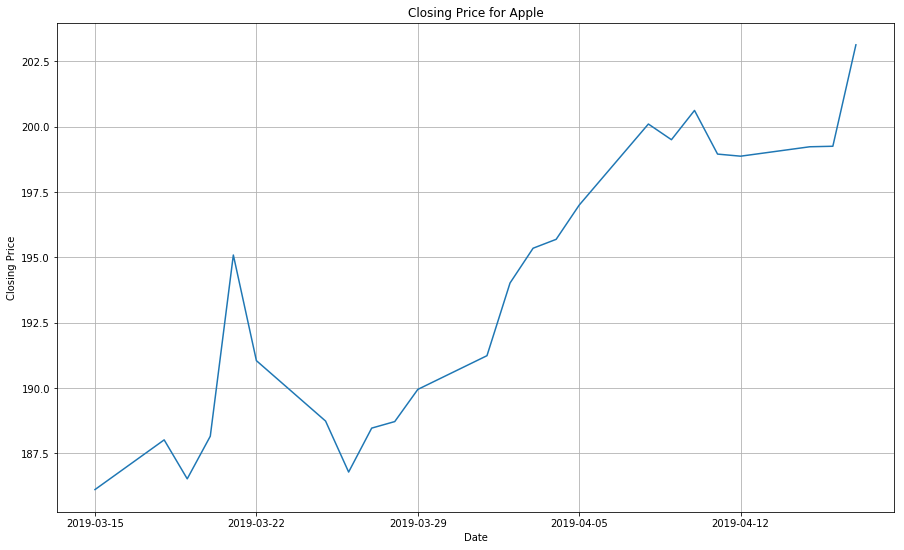

In [3]:
# Plotting Closing Price for Apple
apple.to_csv('Apple_Stock.csv',index=False)
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(apple.index,apple.Close)
plt.title("Closing Price for Apple")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

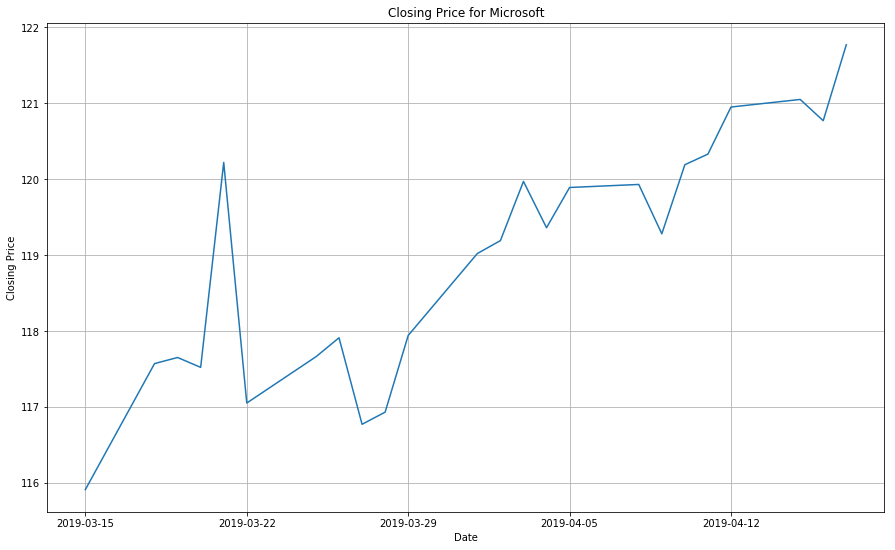

In [4]:
# Let's get Microsoft stock data; The ticker symbol is MSFT
Microsoft = web.DataReader("MSFT", "yahoo", start, end)
Microsoft.reset_index()

# Plotting Closing Price for Microsoft
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(Microsoft.index,Microsoft.Close)
plt.title("Closing Price for Microsoft")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [5]:
Microsoft.to_csv('Microsoft_stock.csv',index=False)

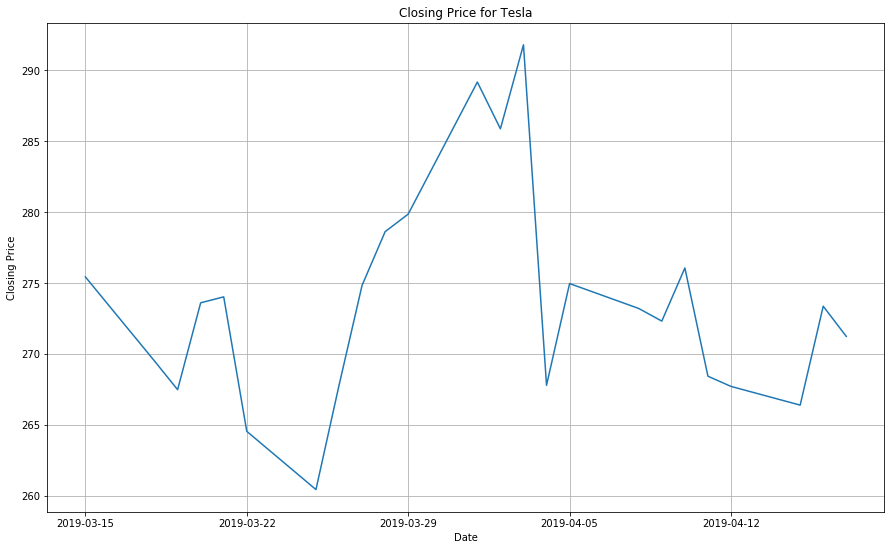

In [6]:
# Let's get Tesla stock data; The ticker symbol is TSLA
Tesla= web.DataReader("TSLA", "yahoo", start, end)
Tesla.reset_index()

# Plotting Closing Price for Tesla
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(Tesla.index,Tesla.Close)
plt.title("Closing Price for Tesla")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [7]:
Tesla.to_csv('Tesla_stock.csv',index=False)

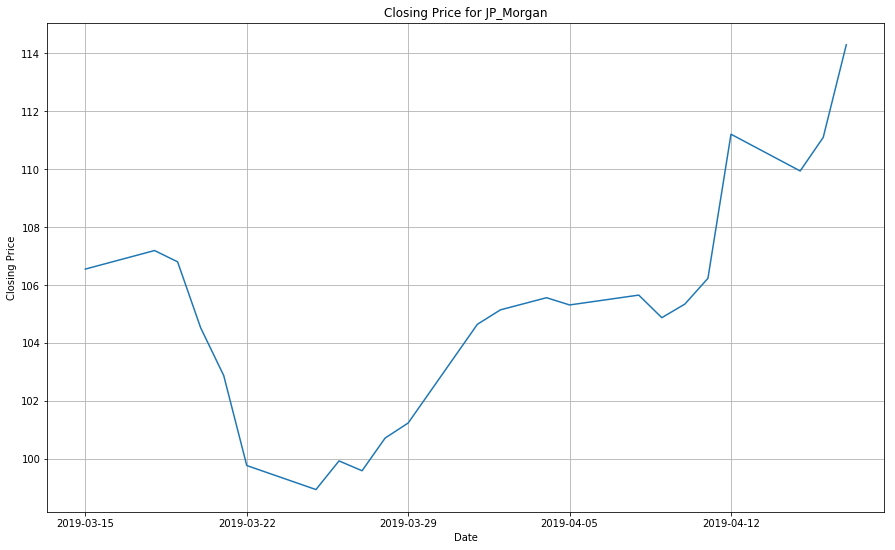

In [8]:
# Let's get JP Morgan stock data; The ticker symbol is JPM
JPMorgan = web.DataReader("JPM", "yahoo", start, end)
JPMorgan.reset_index()

# Plotting Closing Price for JP Morgan
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(JPMorgan.index,JPMorgan.Close)
plt.title("Closing Price for JP_Morgan")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [9]:
JPMorgan.to_csv('JPMorgan_stock.csv',index=False)

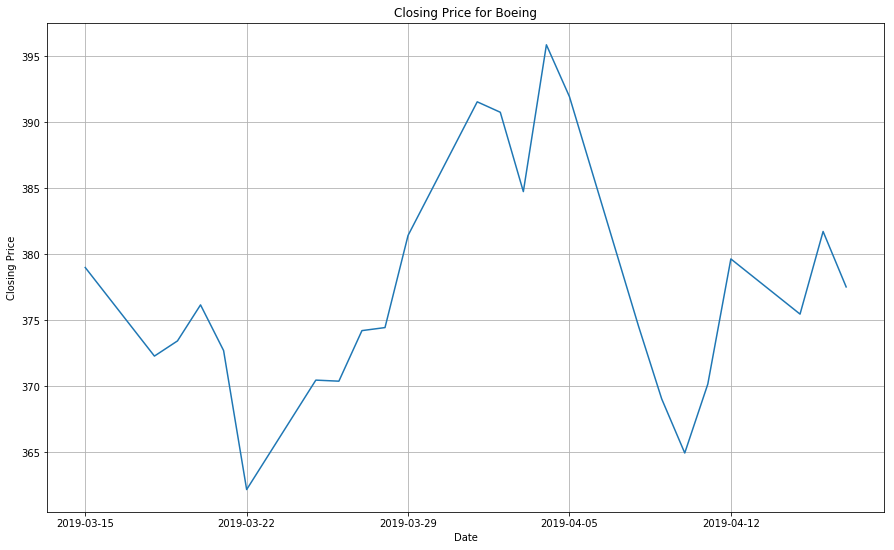

In [10]:
# Let's get Boeing stock data; The ticker symbol is BA
BA = web.DataReader("BA", "yahoo", start, end)
BA.reset_index()

# Plotting Closing Price for Boeing
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(BA.index, BA.Close)
plt.title("Closing Price for Boeing")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


In [11]:
BA.to_csv('Boeing_stock.csv',index=False)

Text(0.5,1,'Daily Closing Price')

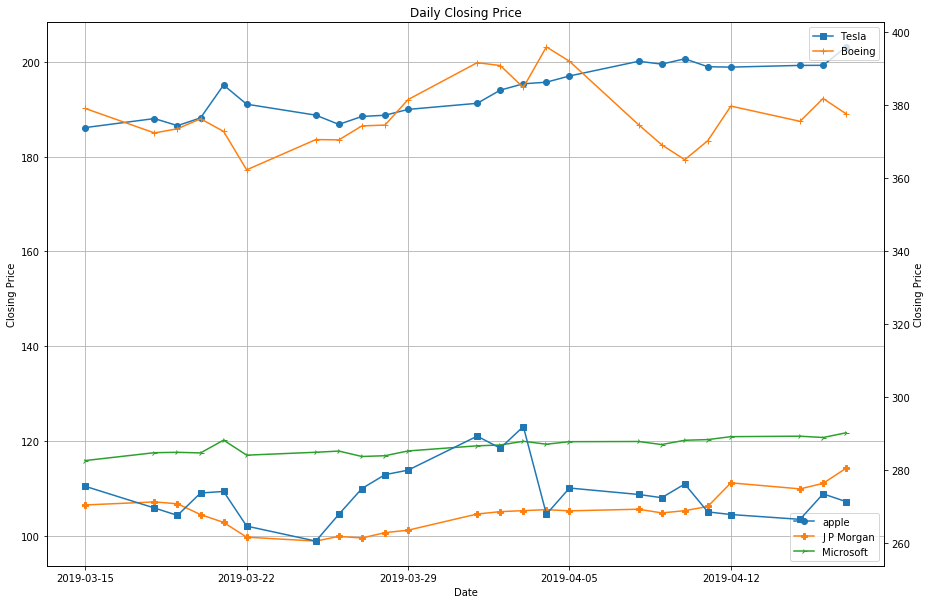

In [12]:
# Creating a dataframe having Closing Prices for all the brands
stock_commbine_close = pd.DataFrame()
stock_commbine_close['Apple'] = apple.Close
stock_commbine_close['Microsoft'] = Microsoft.Close
stock_commbine_close['Tesla'] = Tesla.Close
stock_commbine_close['JPMorgan'] = JPMorgan.Close
stock_commbine_close['BA'] = BA.Close
stock_commbine_close

# Plotting Closing Prices for all the brands in a single plot
fig,ax=plt.subplots(figsize=(15,10))
ax2 = ax.twinx()
ax.plot(stock_commbine_close.index, stock_commbine_close.Apple, marker = 'o')
ax2.plot(stock_commbine_close.index, stock_commbine_close.Tesla, marker = 's')
ax.plot(stock_commbine_close.index, stock_commbine_close.JPMorgan, marker = 'P')
ax.plot(stock_commbine_close.index, stock_commbine_close.Microsoft, marker = '4')
ax2.plot(stock_commbine_close.index, stock_commbine_close.BA, marker = '+')

ax.legend(['apple', 'J P Morgan', 'Microsoft'], loc =4)
ax2.legend(['Tesla', 'Boeing'], loc =1)
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")
ax2.set_ylabel("Closing Price")
ax.grid()
ax.set_title("Daily Closing Price")

### Interpretation 

The above plot shows Daily Closing Price for all the brands. It can be observed that most volatile stocks are Apple and Boeing as they have the highest closing prices. Microsoft is the most stable among all the five. That makes sense with the sentiment analysis results. 

In [13]:
close = BA['Close']

# Getting all weekdays between 03/16/2019 and 04/16/2019
all_weekdays = pd.date_range(start=start, end=end, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [14]:
print(all_weekdays)

DatetimeIndex(['2019-03-15', '2019-03-18', '2019-03-19', '2019-03-20',
               '2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01',
               '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05',
               '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11',
               '2019-04-12', '2019-04-15', '2019-04-16'],
              dtype='datetime64[ns]', freq='B')


In [15]:
close.head(10)

2019-03-15    378.989990
2019-03-18    372.279999
2019-03-19    373.429993
2019-03-20    376.160004
2019-03-21    372.700012
2019-03-22    362.170013
2019-03-25    370.459991
2019-03-26    370.380005
2019-03-27    374.209991
2019-03-28    374.440002
Freq: B, Name: Close, dtype: float64

In [16]:
close.describe()

count     23.000000
mean     377.258261
std        8.866151
min      362.170013
25%      371.369995
50%      374.519989
75%      381.570007
max      395.859985
Name: Close, dtype: float64

In [17]:
# Creating a combined dataframe for all the brands containing Volume
stock_commbine_volume = pd.DataFrame()
stock_commbine_volume['Date'] = apple.Date
stock_commbine_volume['Apple'] = apple.Volume
stock_commbine_volume['Microsoft'] = Microsoft.Volume
stock_commbine_volume['Tesla'] = Tesla.Volume
stock_commbine_volume['JPMorgan'] = JPMorgan.Volume
stock_commbine_volume['BA'] = BA.Volume
stock_commbine_volume.set_index(keys='Date', drop=True)
stock_commbine_volume.drop(columns='Date', axis=1)
stock_commbine_volume

Date     Apple  Microsoft     Tesla    JPMorgan        BA
Date                                                                      
2019-03-15 2019-03-15  39042900   54681100  14785500  24811700.0  26697700
2019-03-18 2019-03-18  26219800   31207600  10281000  12935500.0  13119200
2019-03-19 2019-03-19  31646400   37588700  11800600  12889300.0   9856100
2019-03-20 2019-03-20  31035200   28113300   6908200  14920700.0   8737600
2019-03-21 2019-03-21  51034200   29854400   5947100  19751000.0   6951000
2019-03-22 2019-03-22  42407700   33624500   8745600  31115200.0  10143900
2019-03-25 2019-03-25  43845300   27067100  10215000  21032300.0   7939600
2019-03-26 2019-03-26  49800500   26097700   7350900  15987100.0   6479700
2019-03-27 2019-03-27  29848400   22733400   8779200  12753200.0   9600000
2019-03-28 2019-03-28  20780400   18334800   6774100  12454100.0   4921300
2019-03-29 2019-03-29  23564000   25399800   5991300  14523400.0   7694700
2019-04-01 2019-04-01  27862000   22789100   8110400  17499300.0   7735700
2019-04-02 2019-04-02  22765700   18142300   5478900  10295400.0   6401000
2019-04-03 2019-04-03  23271800   22860700   7929900  11499200.0   7350300
2019-04-04 2019-04-04  19114300   20112800  23720700  11952100.0   9388100
2019-04-05 2019-04-05  18526600   15826200  13038300   9933700.0   6857200
2019-04-08 2019-04-08  25881700   15116200  10410400   8056300.0  14482600
2019-04-09 2019-04-09  35768200   17612000   5904000   9092200.0   7980100
2019-04-10 2019-04-10  21695300   16477200   7061300  10882300.0   8285000
2019-04-11 2019-04-11  20900800   14209100   9835900  11183800.0   6598400
2019-04-12 2019-04-12  27760700   19745100   6746000  25834100.0   7334600
2019-04-15 2019-04-15  17536600   15792600  10038600  15163800.0   3822100
2019-04-16 2019-04-16  25696400   14071800   7272900  11583200.0   7083800
2019-04-17 2019-04-17  28906800   19300900   5126500  17791900.0   4424400

Text(0.5,1,'Volume of Stock-Trade')

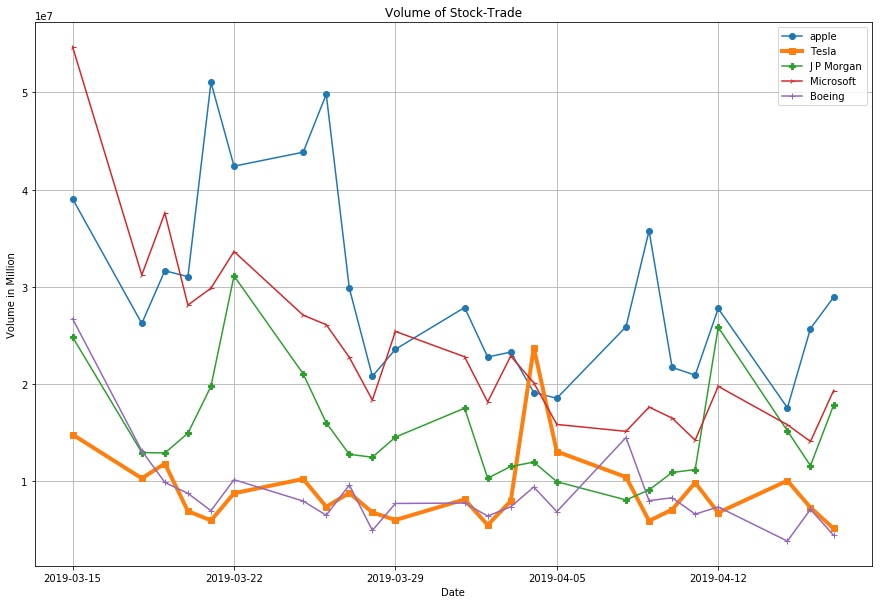

In [18]:
# Plotting Volume with respect to date for all the brands
fig,ax=plt.subplots(figsize=(15,10))
plt.plot(apple.index, apple['Volume'], marker = 'o')
plt.plot(Tesla.index, Tesla['Volume'], marker = 's', linewidth=4)
plt.plot(JPMorgan.index, JPMorgan['Volume'], marker = 'P')
plt.plot(Microsoft.index, Microsoft['Volume'], marker = '4')
plt.plot(BA.index, BA['Volume'], marker = '+')

ax.legend(['apple', 'Tesla', 'J P Morgan', 'Microsoft',"Boeing"])
ax.set_xlabel("Date")
ax.set_ylabel("Volume in Million")
ax.grid()
ax.set_title("Volume of Stock-Trade")

### Interpretation: 

The above plot graphs the daily volume of trades. Apple and Tesla had a surprising fall and spike for the volumes traded but price was only affected for Tesla. This spike and fall drives moving average of Tesla in the graph below. The volume serves an an crucial attribute as it depicts a lot about stock price movement. It can be observed that high traded stock can go either way.

In [19]:
# Rolling Average for all brands
stock_moving_avg = pd.DataFrame()
stock_moving_avg['Date'] = apple.Date
stock_moving_avg['Apple'] = apple.Close.rolling(window=1).mean()
stock_moving_avg['Microsoft'] = Microsoft.Close.rolling(window=1).mean()
stock_moving_avg['Tesla'] = Tesla.Close.rolling(window=1).mean()
stock_moving_avg['JPMorgan'] = JPMorgan.Close.rolling(window=1).mean()
stock_moving_avg['BA'] = BA.Close.rolling(window=1).mean()
stock_moving_avg.set_index(keys='Date', drop=True)
stock_moving_avg.drop(columns='Date', axis=1)
stock_moving_avg

Date       Apple   Microsoft       Tesla    JPMorgan  \
Date                                                                    
2019-03-15 2019-03-15  186.119995  115.910004  275.429993  106.550003   
2019-03-18 2019-03-18  188.020004  117.570000  269.489990  107.190002   
2019-03-19 2019-03-19  186.529999  117.650002  267.470001  106.800003   
2019-03-20 2019-03-20  188.160004  117.519997  273.600006  104.519997   
2019-03-21 2019-03-21  195.089996  120.220001  274.019989  102.870003   
2019-03-22 2019-03-22  191.050003  117.050003  264.529999   99.760002   
2019-03-25 2019-03-25  188.740005  117.660004  260.420013   98.930000   
2019-03-26 2019-03-26  186.789993  117.910004  267.769989   99.919998   
2019-03-27 2019-03-27  188.470001  116.769997  274.829987   99.580002   
2019-03-28 2019-03-28  188.720001  116.930000  278.619995  100.709999   
2019-03-29 2019-03-29  189.949997  117.940002  279.859985  101.230003   
2019-04-01 2019-04-01  191.240005  119.019997  289.179993  104.639999   
2019-04-02 2019-04-02  194.020004  119.190002  285.880005  105.139999   
2019-04-03 2019-04-03  195.350006  119.970001  291.809998  105.349998   
2019-04-04 2019-04-04  195.690002  119.360001  267.779999  105.559998   
2019-04-05 2019-04-05  197.000000  119.889999  274.959991  105.309998   
2019-04-08 2019-04-08  200.100006  119.930000  273.200012  105.650002   
2019-04-09 2019-04-09  199.500000  119.279999  272.309998  104.870003   
2019-04-10 2019-04-10  200.619995  120.190002  276.059998  105.339996   
2019-04-11 2019-04-11  198.949997  120.330002  268.420013  106.230003   
2019-04-12 2019-04-12  198.869995  120.949997  267.700012  111.209999   
2019-04-15 2019-04-15  199.229996  121.050003  266.380005  109.940002   
2019-04-16 2019-04-16  199.250000  120.769997  273.359985  111.099998   
2019-04-17 2019-04-17  203.130005  121.769997  271.230011  114.300003   

                    BA  
Date                    
2019-03-15  378.989990  
2019-03-18  372.279999  
2019-03-19  373.429993  
2019-03-20  376.160004  
2019-03-21  372.700012  
2019-03-22  362.170013  
2019-03-25  370.459991  
2019-03-26  370.380005  
2019-03-27  374.209991  
2019-03-28  374.440002  
2019-03-29  381.420013  
2019-04-01  391.540009  
2019-04-02  390.750000  
2019-04-03  384.739990  
2019-04-04  395.859985  
2019-04-05  391.929993  
2019-04-08  374.519989  
2019-04-09  369.040009  
2019-04-10  364.940002  
2019-04-11  370.160004  
2019-04-12  379.640015  
2019-04-15  375.459991  
2019-04-16  381.720001  
2019-04-17  377.519989

Text(0.5,1,'Rolling Average Of Each Stock')

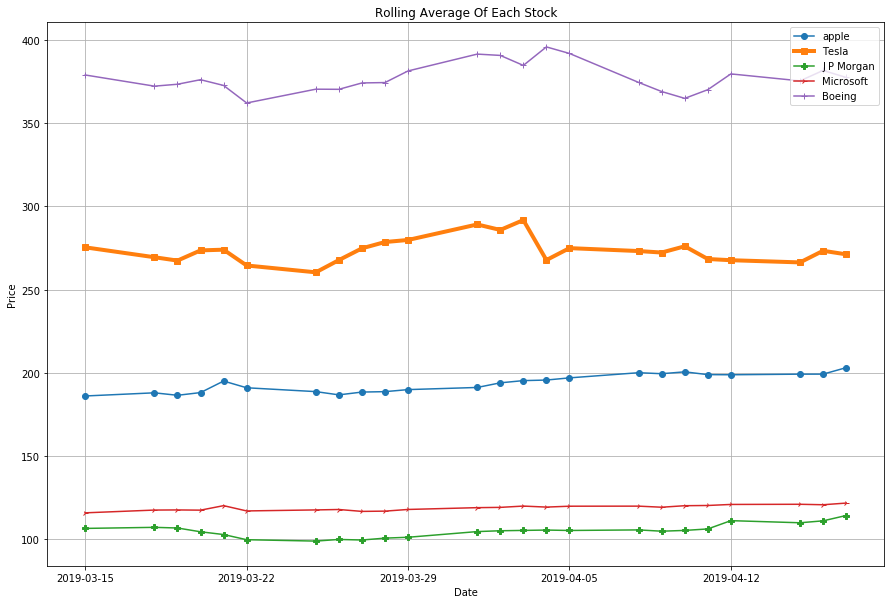

In [20]:
# Plotting Rolling Average for all the brands
fig,ax=plt.subplots(figsize=(15,10))
plt.plot(stock_moving_avg.index, stock_moving_avg.Apple, marker = 'o')
plt.plot(stock_moving_avg.index, stock_moving_avg.Tesla, marker = 's', linewidth=4)
plt.plot(stock_moving_avg.index, stock_moving_avg.JPMorgan, marker = 'P')
plt.plot(stock_moving_avg.index, stock_moving_avg.Microsoft, marker = '4')
plt.plot(stock_moving_avg.index, stock_moving_avg.BA, marker = '+')

ax.legend(['apple', 'Tesla', 'J P Morgan', 'Microsoft',"Boeing"], loc=1)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.grid()
ax.set_title("Rolling Average Of Each Stock")

### Interpretation:

The above plot shows rolling average for all the brands with respect to Date. Price fall can be observed in the for Tesla exactly where it showed Spike in the volume traded. The drop for Boeing can be explained by the recent turmoil for its air carrier model : 737 MAX.